# Starting Couette flow

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [ ]:
def model(y, t, nterms):
    velocity = np.zeros_like(y)
    velocity[:] = y
    for n in range(1, nterms+1):
        velocity += (2. / (n * np.pi)) * (-1)**n * np.sin(n * np.pi * y) * np.exp(-n**2 * np.pi**2 * t)
    return velocity

In [ ]:
def stress_model(y, t, nterms):
    stress = 1
    for n in range(1, nterms+1):
        stress += 2. * (-1)**n * np.cos(n * np.pi * y) * np.exp(-n**2 * np.pi**2 * t)
    return stress

In [9]:
Npts = 100
Tend = 0.01
Ntimesteps = 100000
t = np.linspace(0., Tend, Ntimesteps)
deltat = t[1] - t[0]
y = np.linspace(0., 1., Npts)
deltay = y[1] - y[0]
F = deltat/deltay**2
u = np.zeros(Npts) # initial condition
u_n = np.zeros(Npts) # initial condition
u_n[0] = 0
u_n[Npts-1] = 1

In [ ]:
bottom_stress = []
bottom_stress_model = []
top_stress = []
top_stress_model = []
time_plot = []
plt.figure(figsize=(12,8))
plt.xlim([0,5])
for n in range(0, Ntimesteps):
    for j in range(1, Npts-1):
        u[j] = u_n[j] + F * (u_n[j-1] - 2 * u_n[j] + u_n[j+1])
    u[0] = 0
    u[Npts-1] = 1
    u_n[:] = u[:]
    if (n%10000 == 10):
        #plt.plot(u,y)
        plt.plot((1-y)/np.sqrt(n*deltat),u,'.') # /np.sqrt(n*deltat)
        #plt.plot(model(y,n*deltat,30),y, '.')
        #plt.show()
    #if (n%100 == 0):
     #   bottom_stress.append((u[1] - u[0]) / deltay)
      #  bottom_stress_model.append(stress_model(0,n*deltat,3))
       # top_stress.append((u[Npts-1] - u[Npts-2]) / deltay)
        #top_stress_model.append(stress_model(1,n*deltat,1))
        #time_plot.append(n*deltat)
#plt.plot(time_plot, bottom_stress)
#plt.plot(time_plot, bottom_stress_model)
plt.plot((1-y)/np.sqrt(n*deltat),special.erfc((1-y)/np.sqrt(n*deltat)/2))

# Bin

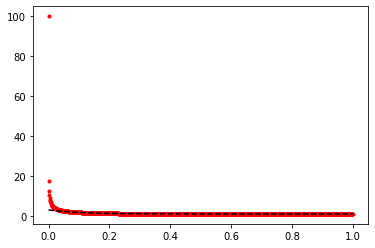

In [10]:
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

# Set initial condition u(x,0) = I(x)
for i in range(0, Npts+1):
    u_n[i] = 0

for n in range(0, 100000):
    # Compute u at inner mesh points
    for i in range(1, Npts):
        u[i] = u_n[i] + F*(u_n[i-1] - 2*u_n[i] + u_n[i+1])

    # Insert boundary conditions
    u[0] = 0;  u[Npts] = 1

    # Update u_n before next step
    u_n[:]= u
    if n>0:
        eta[:]=x/np.sqrt(n*dt)
    bottom_flux = (u[1]-u[0])/dx
    top_flux = (u[Npts]-u[Npts-1])/dx
    #if n in (10,20,50,100,200,500,1000,2000,5000):
    #    plt.xlim([0,10])
    #    plt.plot(eta, u)
    #plt.plot(n*dt,bottom_flux,'k.')
    if n%100==0:
        plt.plot(n*dt,top_flux,'r.')
plt.plot(t,1+2.0*np.exp(-np.pi*np.pi*t), 'k--')

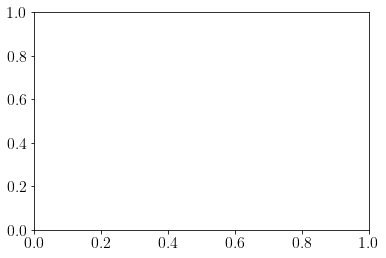

In [63]:
plt.xlim([0,1])
plt.show()

[Text(0.5, 1.0, '$u$')]

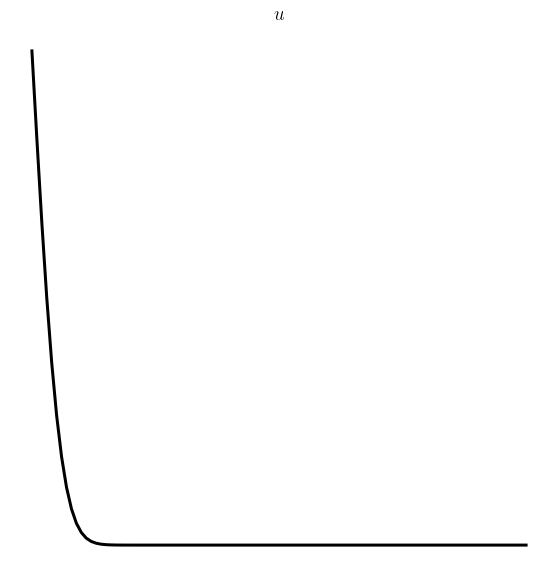

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
# ax.plot(x,y,'b.')  # plot grid points
ax.set_aspect('equal')
ax.plot(x, u, 'k', linewidth=3)
ax.axis('off')
ax.set(title=r'$u$')